![img](.images/diving_greece.jpeg)

# Create Airbnb

**Author:**
Stephanie Ciaccia

## Overview
Crete is a popular destination in Greece, known for its stunning beaches, rich history, and cuisine. The tourism industry is a major contributor to the island's economy, accounting for a significant portion of its GDP and providing employment opportunities to many local residents. 

Between January and March 2023, traffic numbers from non-European airports have increased by double digits compared to the pre-pandemic period in 2019, indicating a strong recovery in the tourism industry.

## Business Problem
As the 2023 high season approaches, the Greek National Tourism Organisation is collaborating with Crete's Municipal Department of Tourism to discuss the vacation rental market with new airbnb hosts and its anticipated increase in demand.

The Greek National Tourism Organisation will be sharing the results of their predictive analysis of Airbnb listings with the local housing committee. The aim of this presentation is to identify the key features associated with high ratings (4 stars and above) on Airbnb listings, to assist new entrants to the Airbnb market. The objective is to offer insights and recommendations to hosts on how to enhance their listings and ultimately improve overall guest satisfaction.

## Data Understanding 


In [181]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import datetime

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
import plotly as plty
from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

from collections import Counter
from nltk.corpus import stopwords

import pandas as pd
from IPython.display import display

Function for printing long lists

In [205]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

### Source #1: Airbnb Listings
I pulled the March 2023 Crete Detailed Listings data from insideairbnb.com. This dataset included over 30,000 listings from the last quarter. Inside Airbnb is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities.

http://insideairbnb.com/

The dataset includes over 30,000 entries and 74 rows of features related to the physical airbnb properties and characteristics of the hosts and reviews. The target column, will be created from **review_scores_rating** which is the overall stars the property has.

I will need to create a new column with the target categorical variable after cleaning the data.

In [206]:
#importing Inside Airbnb data
df = pd.read_csv("data/listings_crete.csv")

In [207]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,28970,https://www.airbnb.com/rooms/28970,20230330024735,2023-03-31,previous scrape,artists' house in the old town,This is a fully renovated stone house from 191...,its calm with many old ladies that adooooore s...,https://a0.muscache.com/pictures/25900225/f18f...,124670,...,4.96,4.51,4.51,NaN,t,2,2,0,0,0.34
1,27966,https://www.airbnb.com/rooms/27966,20230330024735,2023-03-30,city scrape,Heraklion-Pinelopi Apartment,For an unforgettable stay!! Just 10 minutes wa...,Ammoudara is a very cute area with lots of bea...,https://a0.muscache.com/pictures/b8e0ecb1-c444...,120502,...,4.99,4.62,4.92,NaN,t,2,2,0,0,0.87
2,29849,https://www.airbnb.com/rooms/29849,20230330024735,2023-03-30,city scrape,"Villa Kallergi - Nefeli, 6 guests",Villa Nefeli Kallergi with private pool in the...,The traditional village of Loutra was chosen t...,https://a0.muscache.com/pictures/46608920/8497...,125281,...,4.93,4.73,4.80,NaN,f,2,2,0,0,0.14
3,29130,https://www.airbnb.com/rooms/29130,20230330024735,2023-03-30,city scrape,"Villa Kallergi - Athena, 12 guests",Villa Athena Kallergi is in the heart of the C...,The traditional village of Loutra was chosen t...,https://a0.muscache.com/pictures/45889543/1e26...,125281,...,5.00,4.73,5.00,NaN,f,2,2,0,0,0.10
4,31789,https://www.airbnb.com/rooms/31789,20230330024735,2023-03-30,city scrape,Kissamos Windmills,<b>The space</b><br />Kissamos Windmills apart...,NaN,https://a0.muscache.com/pictures/9105111/97bb6...,136649,...,4.50,4.00,4.50,NaN,f,1,1,0,0,0.01


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23372 entries, 0 to 23371
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23372 non-null  int64  
 1   listing_url                                   23372 non-null  object 
 2   scrape_id                                     23372 non-null  int64  
 3   last_scraped                                  23372 non-null  object 
 4   source                                        23372 non-null  object 
 5   name                                          23370 non-null  object 
 6   description                                   22838 non-null  object 
 7   neighborhood_overview                         13180 non-null  object 
 8   picture_url                                   23372 non-null  object 
 9   host_id                                       23372 non-null 

In [209]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.337200e+04,2.337200e+04,2.337200e+04,23372.000000,23372.000000,0.0,23372.000000,23372.000000,23372.000000,0.0,...,17181.000000,17180.000000,17181.000000,17180.000000,17180.000000,23372.000000,23372.000000,23372.000000,23372.000000,17250.000000
mean,1.806035e+17,2.023033e+13,1.820018e+08,41.852687,69.361287,NaN,35.351342,24.614373,4.790861,NaN,...,4.828000,4.882428,4.873811,4.754645,4.754873,24.317217,21.752524,2.416524,0.021179,0.505454
std,3.069823e+17,0.000000e+00,1.550618e+08,126.775145,231.480183,NaN,0.152315,0.679575,2.745473,NaN,...,0.340917,0.318706,0.335535,0.348654,0.378000,52.083157,50.495404,12.723188,0.559364,0.608019
min,2.796600e+04,2.023033e+13,5.127900e+04,1.000000,1.000000,NaN,34.834420,23.529640,1.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.130233e+07,2.023033e+13,4.406371e+07,1.000000,2.000000,NaN,35.285180,24.020455,3.000000,NaN,...,4.790000,4.890000,4.880000,4.670000,4.670000,1.000000,1.000000,0.000000,0.000000,0.130000
50%,3.971123e+07,2.023033e+13,1.379316e+08,4.000000,4.000000,NaN,35.363055,24.481700,4.000000,NaN,...,4.960000,5.000000,5.000000,4.850000,4.860000,4.000000,3.000000,0.000000,0.000000,0.310000
75%,5.592472e+17,2.023033e+13,2.940258e+08,14.000000,16.000000,NaN,35.500255,25.136183,6.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,11.000000,9.000000,0.000000,0.000000,0.650000
max,8.577857e+17,2.023033e+13,5.074666e+08,2429.000000,5180.000000,NaN,35.593770,26.289770,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,256.000000,255.000000,123.000000,19.000000,12.130000


## Data Preparation - cleaning

To startoff I looked at null values to begin thinking about replacement methods for null values. I then further inspected the columns with a correlation matrix which columns should be dropped, to avoid overfitting the model.

In [210]:
#inspecting nulls
df.isna().sum().sort_values(ascending=False).head(30)

bathrooms                       23372
neighbourhood_group_cleansed    23372
calendar_updated                23372
license                         22079
host_neighbourhood              20742
host_about                      11741
neighborhood_overview           10192
neighbourhood                   10192
host_location                    7136
review_scores_value              6192
review_scores_location           6192
review_scores_checkin            6192
review_scores_cleanliness        6191
review_scores_accuracy           6191
review_scores_communication      6191
review_scores_rating             6122
last_review                      6122
first_review                     6122
reviews_per_month                6122
host_response_rate               5201
host_response_time               5201
host_acceptance_rate             2319
bedrooms                         1465
description                       534
beds                              212
bathrooms_text                     42
host_is_supe

In [211]:
#dropping columns that are mainly null

no_values = ['bathrooms', 'neighbourhood_group_cleansed','calendar_updated','license']

for x in no_values:

    df.drop(columns=[x], inplace=True)


In [212]:
#dropping columns that are not needed

not_necessary = ['host_neighbourhood','last_scraped','source','scrape_id',
                 'host_location','host_about','host_acceptance_rate', 'host_thumbnail_url',
                 'host_url','host_name','picture_url','last_review', 'first_review', "host_listings_count",
                 "host_total_listings_count",'host_picture_url',
                 'host_identity_verified','host_has_profile_pic',
                 'host_verifications', 'calendar_last_scraped',"host_id","has_availability",
                 "instant_bookable","calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
                 "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
                "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm","minimum_nights", "maximum_nights",
                'beds']

for x in not_necessary:

    df.drop(columns=[x], inplace=True)

In [213]:
#looking at remaining nulls
df.isna().sum().sort_values(ascending=False).head(10)

neighborhood_overview          10192
neighbourhood                  10192
review_scores_value             6192
review_scores_location          6192
review_scores_checkin           6192
review_scores_communication     6191
review_scores_cleanliness       6191
review_scores_accuracy          6191
reviews_per_month               6122
review_scores_rating            6122
dtype: int64

In [214]:
#replacing null values in description with empty strings with n/a as these are important to keep

no_value = ['neighborhood_overview', 'neighbourhood', 'name', 'description', 'host_response_time', 'neighbourhood']

for x in no_value:
    df[x] = df[x].fillna('n/a')

After looking at the airbnb listings on the website, it appears as though null bedrooms are studio apartments or homes that do not have any bedrooms

In [215]:
#looking at null values of bedroom to determine whether to drop or not
df[df['bedrooms'].isnull()]

,id,listing_url,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
102,297742,https://www.airbnb.com/rooms/297742,"seaview of Libyan Sea, comfy studio with terrace",Casa Rosa Studio has such a great view of the ...,Casa Rosa is situated just above the village o...,2011-12-27,within an hour,100%,f,"Ierapetra, Kriti, Greece",...,1,0,5.00,5.00,5.00,5.00,5.00,4.60,5.00,0.11
113,789777,https://www.airbnb.com/rooms/789777,"Evli 4, spacious apartment, 7 min walk to center",Evli Apartments is fortunately located in the...,If you are looking for a peaceful stay with sp...,2011-07-26,within an hour,100%,t,"Rethimnon, Crete, Greece",...,7,0,4.91,4.95,4.95,4.95,5.00,4.73,4.95,0.39
176,685844,https://www.airbnb.com/rooms/685844,Studio apartment by the sea.,"Fully-equipped studio, fully-equipped kitchen ...",n/a,2012-09-07,within an hour,90%,f,n/a,...,0,0,4.22,4.44,4.56,4.59,4.56,4.56,4.29,0.29
236,876115,https://www.airbnb.com/rooms/876115,Mirabella Studio with Sea View for 2,"ESL 1116395 - Our studios, on the lower floor,...",A peaceful location where you can enjoy the mo...,2013-01-03,within an hour,100%,f,"Agios Nikolaos, Crete, Greece",...,45,0,4.66,4.70,4.65,4.85,4.85,4.70,4.66,1.70
317,1055530,https://www.airbnb.com/rooms/1055530,Beautiful calm rooftop studio with stunning views,"A beautiful self-contained, fully equipped hol...",The studio and neighbouring villa is immersed ...,2013-04-07,within an hour,100%,t,"Chania, Crete Region, Greece",...,9,0,4.89,4.84,4.81,4.84,4.86,4.81,4.84,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23065,844700621948252197,https://www.airbnb.com/rooms/844700621948252197,Irene Luxury Apartments Emmanuel,Απολαύστε την χαλάρωση στα νέα διαμερίσματα IR...,n/a,2023-03-11,n/a,NaN,f,n/a,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23186,852066997317337107,https://www.airbnb.com/rooms/852066997317337107,Enastron Apartment 6 *View-Pool-Parking-BBQ*,New luxury apartment for 2 to 3 people. Enast...,n/a,2022-07-29,within an hour,100%,f,n/a,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23242,852676361817393851,https://www.airbnb.com/rooms/852676361817393851,BalconyStudio Panorama Meerblick,Erlebe in dieser besonderen und familienfreund...,n/a,2015-03-12,within a few hours,89%,f,n/a,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23298,854872123674361782,https://www.airbnb.com/rooms/854872123674361782,Ροδιά στούντιο με πισίνα και θεα,Χαλαρώστε κάνοντας μια μοναδική και ήρεμη απόδ...,n/a,2017-07-09,within an hour,100%,f,n/a,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
#replacing null scores with 0

no_value = ['review_scores_value', 'review_scores_location','review_scores_checkin',
    'review_scores_accuracy','review_scores_communication', 'review_scores_cleanliness',
            'host_response_rate', 'bedrooms', 'reviews_per_month', 'review_scores_rating']

for x in no_value:
    df[x] = df[x].fillna(0)

Dropping the values that are not needed

In [217]:
#checking for nulls
df.isna().sum().sort_values(ascending=False).head(30)

bathrooms_text                 42
host_is_superhost              33
reviews_per_month               0
room_type                       0
property_type                   0
longitude                       0
latitude                        0
neighbourhood_cleansed          0
neighbourhood                   0
host_response_rate              0
host_response_time              0
host_since                      0
neighborhood_overview           0
description                     0
name                            0
listing_url                     0
accommodates                    0
bedrooms                        0
review_scores_value             0
number_of_reviews_l30d          0
review_scores_location          0
review_scores_communication     0
review_scores_checkin           0
review_scores_cleanliness       0
review_scores_accuracy          0
review_scores_rating            0
number_of_reviews_ltm           0
amenities                       0
number_of_reviews               0
availability_3

In [218]:
#dropping empty superhost rows
df['host_is_superhost'].dropna(inplace=True)

## Inspecting values and cleaning them prior to changing datatype

In [219]:
df['host_response_time'].value_counts()

within an hour        14045
n/a                    5201
within a few hours     2206
within a day           1634
a few days or more      286
Name: host_response_time, dtype: int64

In [220]:
df['host_is_superhost'].value_counts()

f    14893
t     8446
Name: host_is_superhost, dtype: int64

In [221]:
#changing host_is_superhost to binary values

bool_list = ['host_is_superhost']

for x in bool_list:

    df[x].replace(['f', 't'], [0, 1], inplace=True)

In [222]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23372 entries, 0 to 23371
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23372 non-null  int64  
 1   listing_url                  23372 non-null  object 
 2   name                         23372 non-null  object 
 3   description                  23372 non-null  object 
 4   neighborhood_overview        23372 non-null  object 
 5   host_since                   23372 non-null  object 
 6   host_response_time           23372 non-null  object 
 7   host_response_rate           23372 non-null  object 
 8   host_is_superhost            23339 non-null  float64
 9   neighbourhood                23372 non-null  object 
 10  neighbourhood_cleansed       23372 non-null  object 
 11  latitude                     23372 non-null  float64
 12  longitude                    23372 non-null  float64
 13  property_type   

In [223]:
#inspecting individual object types
df_object = df.select_dtypes(include="object")

for col in df_object.columns:
    
    print("Column Name: ", col)
    print("Object Type: ", df[col].dtype)
    print("String: ", isinstance(df[col], str))

Column Name:  listing_url
Object Type:  object
String:  False
Column Name:  name
Object Type:  object
String:  False
Column Name:  description
Object Type:  object
String:  False
Column Name:  neighborhood_overview
Object Type:  object
String:  False
Column Name:  host_since
Object Type:  object
String:  False
Column Name:  host_response_time
Object Type:  object
String:  False
Column Name:  host_response_rate
Object Type:  object
String:  False
Column Name:  neighbourhood
Object Type:  object
String:  False
Column Name:  neighbourhood_cleansed
Object Type:  object
String:  False
Column Name:  property_type
Object Type:  object
String:  False
Column Name:  room_type
Object Type:  object
String:  False
Column Name:  bathrooms_text
Object Type:  object
String:  False
Column Name:  amenities
Object Type:  object
String:  False
Column Name:  price
Object Type:  object
String:  False


In [224]:
#changing columns to str

remove_char_list = ['bathrooms_text', 'price','host_response_rate']

#loop to remove non numerical characters

for x in remove_char_list:

    df[x].astype(str)
    df[x] = df[x].str.replace(r'[^\d.]+', '')


In [225]:
#renaming column

df.rename(columns={"bathrooms_text":"bathrooms"}, inplace=True)

In [226]:
#converting host_response_rate to percentage
df['host_response_rate'] = df['host_response_rate'].astype(float)

df['host_response_rate'] = df['host_response_rate'].div(100).round(2)

df['host_response_rate'] = df['host_response_rate'].fillna(0)

#sanity check of null values
df['host_response_rate'].isna().sum()

0

## Converting data types

In [227]:
#changing to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'])
df['price'] = pd.to_numeric(df['price'])

In [229]:
#changing datasypes
float_type = ["bathrooms", "price"]
string_type = ["listing_url", "host_response_time", "name", "description","property_type",
               "neighborhood_overview","host_response_time","neighbourhood"]

change_type = [float_type, string_type]

for x in change_type:
    
    df[float_type].astype(float)
    df[string_type].astype(str)

In [230]:
#resetting index
df.reset_index(drop=True, inplace=True)

# Creating final dataframe for feature selection and modeling

In [231]:
#making new dataframe from final cleaned df dataframe
feature_df = df

In [260]:
#looking at target variables
feature_df['review_scores_rating']

0        4.50
1        4.91
2        5.00
3        5.00
4        5.00
         ... 
23367    0.00
23368    0.00
23369    0.00
23370    0.00
23371    0.00
Name: review_scores_rating, Length: 23372, dtype: float64

In [132]:
# #changing to category for sanity check purposes

# feature_df['listing_rating'] = feature_df['review_scores_rating'].astype(int)

# feature_df['listing_rating'] = feature_df['listing_rating'].astype(str)

# feature_df['listing_rating'] = feature_df['listing_rating'] + ' Stars' 

In [133]:
#sanity check
#feature_df['listing_rating'].value_counts()

In [134]:
#renaming column
feature_df.rename(columns={'review_scores_rating':'airbnb_rating'}, inplace=True)

In [233]:
feature_df['airbnb_rating'] = feature_df['review_scores_rating']

## Manually claeaning amenities column

After inspecting the description, name, and amenities columns and analyzing the most common words present in each of these columns (comprised on long string), I decided to only use the **amenities** column as an indicator of the listings key features. If I had additional time, I would have liked to do a sentiment analysis on the titles and descriptions to see how this impacted scores.

- Cleaning: Since there are over 21000 different amenities and that they play an important role in listings, I cleaned the columns by removing stop words, unnecessary words and phrases, and then used Counter to count the most common features to help analyze which ones should be kept. I tried to limit repetitive features such as soap, linens, hair dryer. I iterated through the list many times until I cleaned up the values.

In [234]:
#making all values lowercase
feature_df['amenities'] = feature_df['amenities'].apply(str.lower)

#removing all characters that aren't letters
feature_df['amenities'] = feature_df['amenities'].str.replace('[^a-zA-Z\s]', '', regex=True)

In [235]:
#creating additional list of stop words and unneeded strings to drop
drop_list = ['space</b><br','/>The','/><br','is', 'you',
             'located', 'The', "και", "/><b>The", "<br", "one", "two", "room", "living", "fully", "equipped", "area",
            "It", "με", "double", "also", 'bed', 'beautiful', 'floor', 'enjoy', 'away', 'bathroom', 'bedroom', '&' ,'το',
            'offers', 'dining', '3', 'ideal', 'km', 'large', '/><b>Guest', 'access</b><br', 'minutes', 'bedrooms', 'small',
            'από','city','σε', '/>', 'free', '4', 'Cretan', '-', '2', '3', 'old', 'near', 'home', '1',"allowed",
             'water', 'maker', "hangers","hot", 'u', "street", 'cooking', "premises", "clothing", "silverware", "fire",
             "extinguisher", "first", "aid", "kit", "street", "shower", 'wine', 'glasses', 'storage', 'rack', 'gel', 'free',
            'greets', 'host', 'iron', 'entrance', 'extra', 'outdoor', 'free', 'private', 'table', 'drying', 'available',
             'high','pillows', 'blankets','baking', 'sheet', 'kettle', 'furniture', 'unit', 'pack', 'un', 'playtravel',
             'roomdarkening', 'childrenus', 'chair', 'shades','smoke', 'freezer', 'books', 'shared','body_soap','alarm',
            'system', 'lockbox','soap', 'body', 'linens', 'hair_dryer', 'toaster', 'basics', 'cleaning_products',
            "wardrobe", "upon", "request", "fenced", 'safe', 'type', 'toys', 'drip', 'single', 'level', 'dryer',
            'baby', 'mini','fridge', "stainless", "steel", "carbon", "carbon", "monoxide", "central", "building"
            ,"coutryard", "public","ethernet", "connection"]

#removing additional words after filtering through results
feature_df['amenities'] = feature_df['amenities'].apply(lambda x: ' '.join([word for word in x.split() if word not in (drop_list)]))

In [236]:
#updating feature name
feature_df.replace({"amenities": {'long term stays':'long_term_stays', "air conditioning": "air_conditioning",
                                  "beach access":"beach_access", "hair dryer":"hair_dryer", "hair dryer":"hair_dryer",
                                  "shared pool":"shared_pool", "luggage dropoff": "luggage_dropoff",
                                  "private pool":"private_pool","fast wifi":"fast_wifi","sea view":"sea_view",
                                 "hot water":"hot_water","dedicated workspace":"dedicated_workspace",
                                  "private parking":"private_parking","cleaning products":"cleaning_products",
                                  "bbq grill": "bbq_grill","self checkin":"self_checkin", "hdtv":"tv",
                                  "ac split ductless":"ac_split_ductless"}}, regex=True, inplace=True)

stop_words = set(stopwords.words("english"))

# removing stopwords
feature_df['amenities'] = feature_df['amenities'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#making dataframe
top_attributes_amen = pd.DataFrame(Counter(" ".join(feature_df['amenities']).split()).most_common(100))
top_attributes_amen = top_attributes_amen[top_attributes_amen[0] != "Crete"]

#changing column name and datatype
top_attributes_amen.rename(columns={0:"amenity", 1:"amenity_count"}, inplace=True)
top_attributes_amen['amenity'] = top_attributes_amen['amenity'].astype(str)

#dropping repeat rows
top_attributes_amen = top_attributes_amen.drop([18, 27, 28, 36, 37, 38, 39, 40])

#inspecting top values
top_attributes_amen.head(60)

,amenity,amenity_count
0,parking,27648
1,view,27503
2,coffee,26132
3,essentials,23643
4,wifi,22706
5,kitchen,21891
6,tv,21407
7,hair,20856
8,air_conditioning,18590
9,dishes,17887


### Merging top characterisitcs into a dataframe

In [237]:
# making function to loop through two lists and replace the values
def replace_list_order(list_1, list_2, dataframe, column):
    for (a, b) in zip(list_1, list_2):
        dataframe = dataframe.replace({column: {a:b}})
    return pd.DataFrame(dataframe[column])

### Translating town names to english

In [238]:
feature_df['neighbourhood_cleansed'].value_counts()

Χανίων                   5192
Ρεθύμνης                 2806
Χερσονήσου               2069
Αποκορώνου               1662
Ηρακλείου                1633
Αγίου Νικολάου           1352
Κισσάμου                 1334
Πλατανιά                 1225
Μαλεβιζίου               1032
Αγίου Βασιλείου           990
Ιεράπετρας                877
Φαιστού                   834
Μυλοποτάμου               626
Σητείας                   583
Καντάνου - Σέλινου        313
Αρχανών - Αστερουσίων     191
Βιάννου                   157
Σφακίων                   134
Γόρτυνας                  115
Μινώα Πεδιάδας             93
Αμάριου                    68
Οροπεδίου Λασιθίου         41
Γαύδου                     24
Ανωγείων                   21
Name: neighbourhood_cleansed, dtype: int64

I researched the town names and created two lists in order to rename the values.

In [239]:
#renaming the greek towns

greek_town = ['Χανίων', 'Ρεθύμνης','Χερσονήσου','Αποκορώνου','Ηρακλείου','Αγίου Νικολάου','Κισσάμου',
              'Πλατανιά','Μαλεβιζίου','Αγίου Βασιλείου','Ιεράπετρας','Φαιστού','Μυλοποτάμου', 'Σητείας',
              'Καντάνου - Σέλινου','Αρχανών - Αστερουσίων','Βιάννου',
              'Σφακίων','Γόρτυνας','Μινώα Πεδιάδας','Αμάριου','Οροπεδίου Λασιθίου','Γαύδου','Ανωγείων']
              
              
english_town = ["Chania", "Rethymno", "Hersonissos", "Apokoronas", "Heraklion", "Agios Nikolaos", "Kissamos", 
               "Platanias","Malevizi", "Agios Vasilios", "Ierapetra", "Phaistos", "Mylopotamos", "Siteia",
               "Kantanos-Selino","Archanes-Asterousia", "Viannos", "Sfakia", "Gortyna", "Minoa Pediada", "Amari",
               "Oropedio Lasithiou","Gavdos","Anogeia"]

In [240]:
feature_df['neighbourhood_cleansed'] = replace_list_order(greek_town, english_town, feature_df, "neighbourhood_cleansed")

In [241]:
#sanity check
feature_df['neighbourhood_cleansed'].value_counts()

Chania                 5192
Rethymno               2806
Hersonissos            2069
Apokoronas             1662
Heraklion              1633
Agios Nikolaos         1352
Kissamos               1334
Platanias              1225
Malevizi               1032
Agios Vasilios          990
Ierapetra               877
Phaistos                834
Mylopotamos             626
Siteia                  583
Kantanos-Selino         313
Archanes-Asterousia     191
Viannos                 157
Sfakia                  134
Gortyna                 115
Minoa Pediada            93
Amari                    68
Oropedio Lasithiou       41
Gavdos                   24
Anogeia                  21
Name: neighbourhood_cleansed, dtype: int64

## Renaming the final cleaned dataset to **final_feature_df**.

In [242]:
#making list of top 15 most common words from the amenities column and adding back to new list
vocab_list = top_attributes_amen['amenity'].tolist()
top_vocab_list = vocab_list[0:40]

In [243]:
#renaming dataframe
final_feature_df = feature_df

In [244]:
#defining function that makes all letters lowercase and checks to see if keyword is in column
def check_keyword(column, keyword):
    return int(keyword.lower() in column.lower())

# apply the function

for kw in top_vocab_list:
    feature_df[kw] = final_feature_df['amenities'].apply(check_keyword, keyword=kw)

In [245]:
final_feature_df.head()

,id,listing_url,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood,...,smoking,mountain,pets,barbecue,utensils,electric,courtyard,beachfront,dinnerware,netflix
0,28970,https://www.airbnb.com/rooms/28970,artists' house in the old town,This is a fully renovated stone house from 191...,its calm with many old ladies that adooooore s...,2010-05-14,within an hour,1.0,0.0,"Heraklion, Κρήτη, Greece",...,0,0,1,0,0,1,0,0,0,0
1,27966,https://www.airbnb.com/rooms/27966,Heraklion-Pinelopi Apartment,For an unforgettable stay!! Just 10 minutes wa...,Ammoudara is a very cute area with lots of bea...,2010-05-08,within an hour,1.0,1.0,"Gazi, Greece",...,0,0,0,0,0,0,0,0,0,0
2,29849,https://www.airbnb.com/rooms/29849,"Villa Kallergi - Nefeli, 6 guests",Villa Nefeli Kallergi with private pool in the...,The traditional village of Loutra was chosen t...,2010-05-15,within an hour,1.0,1.0,"Loutra, Crete, Greece",...,0,1,1,1,1,0,1,0,0,1
3,29130,https://www.airbnb.com/rooms/29130,"Villa Kallergi - Athena, 12 guests",Villa Athena Kallergi is in the heart of the C...,The traditional village of Loutra was chosen t...,2010-05-15,within an hour,1.0,1.0,"Loutra, Crete, Greece",...,0,1,1,1,1,1,1,0,0,1
4,31789,https://www.airbnb.com/rooms/31789,Kissamos Windmills,<b>The space</b><br />Kissamos Windmills apart...,n/a,2010-06-01,n/a,0.0,0.0,n/a,...,0,0,0,0,0,0,0,0,0,0


## Renaming property type to six classes

In [246]:
#making all values lowercase
final_feature_df['property_type'] = final_feature_df['property_type'].apply(str.lower)

#removing all characters that aren't letters
final_feature_df['property_type'] = final_feature_df['property_type'].str.replace('[^a-zA-Z\s]', '', regex=True)

In [247]:
original_value = ['entire rental unit', 'entire villa', 'entire home', 'entire condo','room in hotel',
            'entire cottage', 'entire serviced apartment', 'private room in rental unit', 'room in aparthotel',
            'room in boutique hotel', 'entire townhouse', 'private room in bed and breakfast', 'entire vacation home',
            'cycladic home', 'private room in serviced apartment', 'entire guest suite', 'entire guesthouse',
            'entire bungalow', 'private room in condo', 'room in serviced apartment', 'private room in resort',
            'entire loft', 'private room in home', 'earthen home', 'tiny home', 'entire place',
            'private room in villa', 'farm stay', 'private room in guesthouse', 'private room',
            'room in bed and breakfast', 'shared room', 'private room in vacation home',
            'private room in guest suite', 'shared room in hostel', 'boat', 'entire cabin',
            'private room in townhouse', 'private room in hostel', 'castle', 'private room in cottage',
            'camperrv', 'private room in loft', 'tent', 'room in hostel', 'room in nature lodge', 'campsite',
            'cave', 'private room in tiny home', 'island', 'entire chalet', 'entire bed and breakfast', 'dome',
            'casa particular', 'private room in tent', 'private room in earthen home', 'private room in farm stay',
            'private room in nature lodge', 'entire homeapt', 'private room in cycladic house', 'barn', 'floor',
            'shared room in vacation home', 'treehouse', 'shared room in rental unit', 'shared room in cycladic house', 'tower',
            'bus', 'shared room in townhouse', 'shared room in guest suite', 'room in rental unit',
            'hut', 'private room in tipi', 'private room in minsu', 'private room in dorm',
            'private room in casa particular', 'private room in camperrv', 'private room in cabin', 'windmill',
                  "private room in special"]


In [248]:
updated_list = ['entire rental unit', 'entire villa', 'entire home', 'entire condo', 'room in hotel',
                'entire home', 'entire rental unit', 'private room', 'room in hotel', 'room in hotel',
                'entire townhouse', 'private room', 'entire home', 'entire home', 'private room',
                'entire rental unit', 'entire guesthouse', 'entire home', 'private room', 'private room',
                'private room', 'entire home', 'private room', 'entire home', 'entire home', 'entire home',
                'private room', 'entire home', 'private room', 'private room', 'private room', 'shared room',
                'private room', 'private room', 'private room', 'entire home', 'boat', 'private room', 'special',
                'private room', 'private room', 'special', 'private room', 'special', 'private room', 'private room',
                'special', 'special', 'entire villa', 'island', 'private room', 'entire bed and breakfast', 'special',
                'entire home', 'private room', 'private room', 'private room', 'private room', 'private room',
                'entire home', 'shared room', 'shared room', 'special', 'special', 'shared room', 'shared room',
                'private room', 'private room', 'special', 'special', 'private room', 'special', 'private room',
                'shared room', 'private room', 'special', 'private room', 'shared room', 'private room', "private room"]


In [249]:
final_feature_df['property_type'] = final_feature_df['property_type'].replace(original_value, updated_list)

In [250]:
final_feature_df['property_type'].value_counts()

entire rental unit          7368
entire home                 5630
entire villa                5020
entire condo                1798
room in hotel               1672
private room                1427
entire townhouse             265
entire guesthouse             91
special                       51
shared room                   28
boat                          13
entire bed and breakfast       4
island                         4
room in resort                 1
Name: property_type, dtype: int64

## Adding final categorical target column

In [251]:
final_feature_df.airbnb_rating

0        4.50
1        4.91
2        5.00
3        5.00
4        5.00
         ... 
23367    0.00
23368    0.00
23369    0.00
23370    0.00
23371    0.00
Name: airbnb_rating, Length: 23372, dtype: float64

In [257]:
final_feature_df['airbnb_rating']

0         4.5
1        4.91
2         5.0
3         5.0
4         5.0
         ... 
23367     0.0
23368     0.0
23369     0.0
23370     0.0
23371     0.0
Name: airbnb_rating, Length: 23372, dtype: object

In [258]:
final_feature_df['airbnb_rating'] = final_feature_df['airbnb_rating'].astype(str)

In [259]:
#making final categorical target column which makes the ratings binary and puts them in two classes
# The classes are Above Four Stars and Below Four Stars

l_is_grte_4stars = []

for rating in final_feature_df.airbnb_rating:
    if int(rating.split(' ')[0]) >= 4:
        l_is_grte_4stars.append("Above Four Stars")
    else:
        l_is_grte_4stars.append("Below Four Stars")
        

final_feature_df['Airbnb Rating'] = l_is_grte_4stars

ValueError: invalid literal for int() with base 10: '4.5'

In [255]:
#sanity check of classification distribution
final_feature_df.airbnb_rating.value_counts(normalize=True)

5.0     0.304938
0.0     0.264333
4.5     0.020837
4.67    0.018227
4.0     0.017072
          ...   
1.5     0.000043
3.4     0.000043
3.95    0.000043
4.34    0.000043
4.04    0.000043
Name: airbnb_rating, Length: 133, dtype: float64

# Analyzing Features

In [261]:
final_feature_df['Airbnb Rating'].hist(bins='auto');

In [170]:
final_feature_df.head()

,id,listing_url,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood,...,mountain,pets,barbecue,utensils,electric,courtyard,beachfront,dinnerware,netflix,Airbnb Rating
0,28970,https://www.airbnb.com/rooms/28970,artists' house in the old town,This is a fully renovated stone house from 191...,its calm with many old ladies that adooooore s...,2010-05-14,within an hour,100%,0.0,"Heraklion, Κρήτη, Greece",...,0,1,0,0,1,0,0,0,0,Above Four Stars
1,27966,https://www.airbnb.com/rooms/27966,Heraklion-Pinelopi Apartment,For an unforgettable stay!! Just 10 minutes wa...,Ammoudara is a very cute area with lots of bea...,2010-05-08,within an hour,100%,1.0,"Gazi, Greece",...,0,0,0,0,0,0,0,0,0,Above Four Stars
2,29849,https://www.airbnb.com/rooms/29849,"Villa Kallergi - Nefeli, 6 guests",Villa Nefeli Kallergi with private pool in the...,The traditional village of Loutra was chosen t...,2010-05-15,within an hour,100%,1.0,"Loutra, Crete, Greece",...,1,1,1,1,0,1,0,0,1,Above Four Stars
3,29130,https://www.airbnb.com/rooms/29130,"Villa Kallergi - Athena, 12 guests",Villa Athena Kallergi is in the heart of the C...,The traditional village of Loutra was chosen t...,2010-05-15,within an hour,100%,1.0,"Loutra, Crete, Greece",...,1,1,1,1,1,1,0,0,1,Above Four Stars
4,31789,https://www.airbnb.com/rooms/31789,Kissamos Windmills,<b>The space</b><br />Kissamos Windmills apart...,n/a,2010-06-01,n/a,0,0.0,n/a,...,0,0,0,0,0,0,0,0,0,Above Four Stars


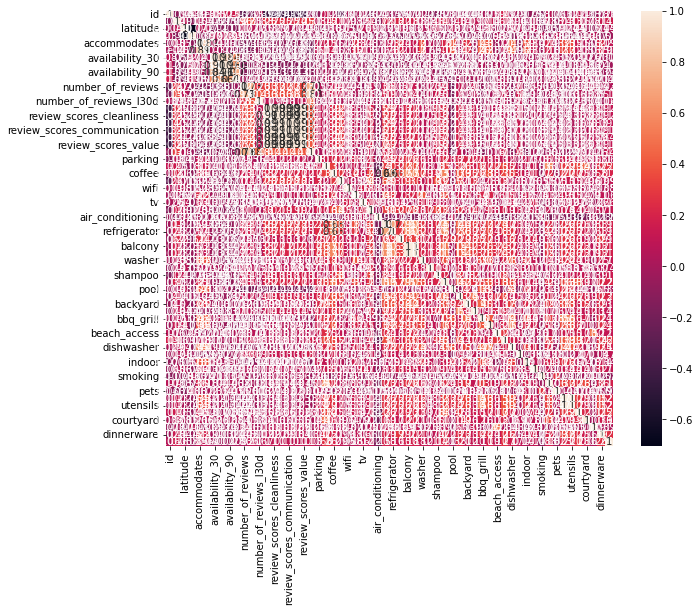

In [171]:
# looking at corr of numeric variables which is way too big
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(final_feature_df.corr(), annot=True)
plt.show()

In [262]:
corr_matrix = pd.DataFrame(df.corr(method='pearson'))
print_full(corr_matrix['review_scores_rating'].sort_values(ascending=False))

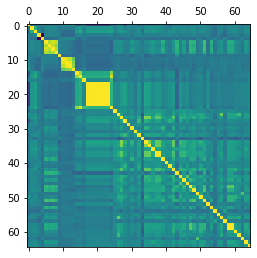

In [636]:
plt.matshow(df.corr())
plt.show()

In [638]:
final_feature_df['airbnb_rating']

0        4 Stars
1        4 Stars
2        5 Stars
3        5 Stars
4        5 Stars
          ...   
23081    0 Stars
23082    0 Stars
23083    0 Stars
23084    0 Stars
23085    0 Stars
Name: airbnb_rating, Length: 23086, dtype: object

In [639]:
corr_matrix = pd.DataFrame(final_feature_df.corr(method='pearson'))

print_full(corr_matrix['review_scores_rating'].sort_values(ascending=False))

review_scores_rating           1.000000
review_scores_value            0.994399
review_scores_accuracy         0.993442
review_scores_cleanliness      0.993388
review_scores_communication    0.993290
review_scores_checkin          0.992504
review_scores_location         0.989616
reviews_per_month              0.396261
number_of_reviews_ltm          0.356035
number_of_reviews              0.318674
dishes                         0.283261
essentials                     0.268578
host_is_superhost              0.252232
refrigerator                   0.245573
stove                          0.217594
coffee                         0.215107
patio                          0.205086
balcony                        0.205086
hair                           0.191936
long_term_stays                0.186245
host_response_rate             0.185122
shampoo                        0.174105
luggage_dropoff                0.139915
self_checkin                   0.128583
crib                           0.126889


In [1358]:
l_is_grte_4stars = []

for rating in final_feature_df.airbnb_rating:
    if int(rating.split(' ')[0]) >= 4:
        l_is_grte_4stars.append("Above Four Stars")
    else:
        l_is_grte_4stars.append("Below Four Stars")
        

final_feature_df['Airbnb Rating'] = l_is_grte_4stars

#sanity check of classification distribution
final_feature_df.is_grte_4stars.value_counts()

In [649]:
final_feature_df.is_grte_4stars.value_counts()

1    16771
0     6315
Name: is_grte_4stars, dtype: int64

In [650]:
final_feature_df.isna().sum().sum()

28

In [651]:
final_feature_df.dropna(inplace=True)

In [652]:
final_feature_df.isna().sum().sum()

0

In [916]:
corr_matrix = pd.DataFrame(final_feature_df.corr(method='pearson'))

print_full(corr_matrix['is_grte_4stars'].sort_values(ascending=False))

is_grte_4stars        1.000000
dishes                0.280013
essentials            0.266258
host_is_superhost     0.245897
refrigerator          0.243106
stove                 0.212662
coffee                0.210239
balcony               0.203115
patio                 0.203115
hair                  0.188089
host_response_rate    0.184905
long_term_stays       0.183684
shampoo               0.171467
luggage_dropoff       0.139186
self_checkin          0.126356
crib                  0.123703
kitchen               0.119160
parking               0.114733
backyard              0.106311
netflix               0.102052
heating               0.101338
beachfront            0.089274
wifi                  0.086311
dinnerware            0.085772
washer                0.084360
view                  0.082843
cleaning_products     0.081976
beach_access          0.081503
cable                 0.079186
electric              0.060891
microwave             0.057871
courtyard             0.055175
mountain

# One hot encoding categorical features & train test split

In [263]:
#dropping final columns before one hot encoding
#final_feature_df.drop(columns=["name","neighbourhood","id","listing_url", "description","neighborhood_overview",'review_scores_checkin',
                                 'review_scores_communication','review_scores_location','review_scores_value',
                                "availability_30","availability_60","availability_90",
                                "availability_365","host_response_time","review_scores_accuracy","host_since",
                               "property_type","amenities","number_of_reviews","review_scores_cleanliness","review_scores_rating",
                               "number_of_reviews_ltm","number_of_reviews_l30d",
                              "reviews_per_month"], inplace=True)

In [684]:
categorical_features_names = ['neighbourhood_cleansed', "room_type"]

enc = OneHotEncoder()


enc_data = pd.DataFrame(enc.fit_transform(
                final_feature_df[categorical_features_names]).toarray())
      
enc_cols = enc.get_feature_names()

mapped_cols = []

for col in enc_cols:
    if 'x0' in col:
        mapped_col = col.replace('x0', categorical_features_names[0])
    if 'x1' in col:
        mapped_col = col.replace('x1',categorical_features_names[1])
    
    mapped_cols.append(mapped_col)

enc_data.columns = mapped_cols

# Merging OHC with final dataframe`
model_dt_df = pd.merge(final_feature_df, enc_data, left_index=True, right_index=True)

# Dummy Classifier Model

In [685]:
# defining features
X = model_dt_df.drop(categorical_features_names + ['airbnb_rating'] + ['is_grte_4stars'], axis=1)
y = model_dt_df.is_grte_4stars

# Split for test & training  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [686]:
#sanity check
(X_test).shape

(6909, 77)

In [687]:
dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [688]:
#checking distribution of target variables
y_test.value_counts(normalize=True)

1    0.726299
0    0.273701
Name: is_grte_4stars, dtype: float64

The dummy model score gives us a cross_val_score of 67%. This means that the accuracy of the model is 67% if we always guess the majority class

In [689]:
# Checking cross_val_score
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=3)
cv_results.mean()

0.7277464156207207

In [1006]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=15):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring="precision")
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} precision
        ''')
        print(cv_summary)
        
        
    def print_df_results(self):
        df_cv_score = pd.DataFrame(zip(self.cv_results, self.cv_mean),
                              columns=['cv_precision_score', 'mean_cv_precision_score'], index=metrics)
        return df

    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Precision Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )   
    
        return ax

In [899]:
#cross validation
dummy_model_results = ModelWithCV(model=dummy_model, model_name='dummy',X=X_train, y=y_train)

In [900]:
type(dummy_model_results)

__main__.ModelWithCV

CV Results for `dummy` model:
            0.72775 ± 0.00038 precision
        


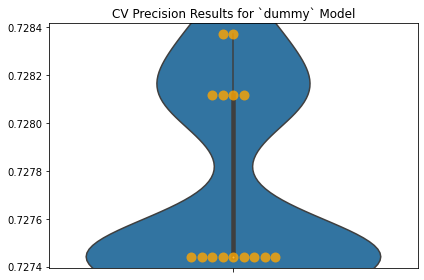

In [901]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

In [ ]:
cv_df = get_cross_val_dataframe(dt_model_1, X_train, y_train, kfolds=5, scoring="precision")
model_cv_mean = pd.DataFrame(np.mean(cv_df), columns=['Base Model'])

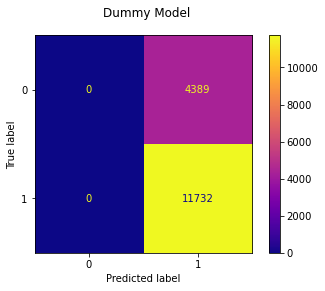

In [902]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [903]:
# just the numbers (this should work even with older scikit-learn)
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[    0,  4389],
       [    0, 11732]])

# Final Model Performance Metric Overview


To look at the overall performance of the model, I will first be looking at the cross validation score and **precision score**. Precision will be my main metric to determine the final model's performance.

- The cross validation score will determine the general performance of the decision tree model and help detect overfitting.

- The precision score is the main metric I will be using, as it is important to reduce false positives while predicting ratings.  


When I intiially ran the base model, I included features that were too highly correlated with the target variable, so I dropped those in the data cleaning section. Those features included:

- number_of_reviews
- review_scores_cleanliness
- review_scores_rating

I originally wanted to include these in the model, but after further looking into the business problem I determined that it was best to remove these values as it did not provide insight into what to do in order to obtain reviews.

# Train Test Split

In [1380]:
model_dt_df.rename(columns={"host_is_superhost": "superhost", "host_response_rate":"host response rate"}, inplace=True)

In [1381]:
model_dt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23030 entries, 0 to 23057
Data columns (total 81 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   host response rate                          23030 non-null  float64
 1   superhost                                   23030 non-null  int64  
 2   neighbourhood_cleansed                      23030 non-null  object 
 3   latitude                                    23030 non-null  float64
 4   longitude                                   23030 non-null  float64
 5   room_type                                   23030 non-null  object 
 6   accommodates                                23030 non-null  int64  
 7   bathrooms                                   23030 non-null  float64
 8   bedrooms                                    23030 non-null  float64
 9   beds                                        23030 non-null  float64
 10  price     

In [1382]:
# defining features
X = model_dt_df.drop(categorical_features_names + ['airbnb_rating'] + 
                            ['is_grte_4stars'], axis=1)
y = model_dt_df.is_grte_4stars

# Split for test & training  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

# Model Performance Metric Overview


To look at the overall performance of all models, I will first be looking at the cross validation scores and precision score. **Precision** will be my main metric to determine the final model's performance.

- The cross validation score will determine the general performance of the decision tree model and help detect overfitting.

- The precision score is the main metric I will be using, as it is important to reduce false positives while predicting ratings. This is essential as we do not want to misclassify low star properties as having high starts, as it will give airbnb hosts false expectations of an increase in bookings and reviews.


When I intiially ran the base model, I included features that were too highly correlated with the target variable, so I dropped those in the data cleaning section. Those features included:

- number_of_reviews
- review_scores_cleanliness
- review_scores_rating

I originally wanted to include these in the model, but after further looking into the business problem I determined that it was best to remove these values as it did not provide insight into what to do in order to obtain reviews. So though number_of_reviews is the highest correlated feature, it was removed from the model.

# #1 Decision Tree

In [905]:
#fitting model
dt_model_1 = DecisionTreeClassifier(random_state=42)

#fitting model
dt_model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Base Model Analysis

The base model has a cross validation score of 81%, which is an improvement from the dummy model. The model does not appear to be overfit.

CV Results for `tree_bi` model:
            0.81510 ± 0.00875 precision
        
None


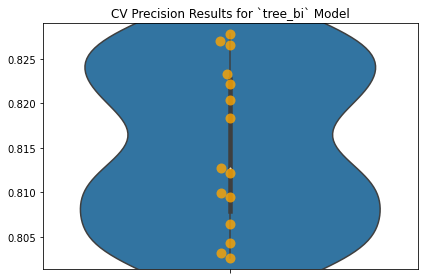

In [989]:
#cross validation of scores
model_results = ModelWithCV(model = dt_model_1, model_name='tree_bi',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();

# Print CV results
model_results.print_cv_summary()

In [1047]:
#making a dataframe out of the column
cv_df = get_cross_val_dataframe(dt_model_1, X_train, y_train, kfolds=5, scoring="precision")
model_cv_mean = pd.DataFrame(np.mean(cv_df), columns=['Base Model'])

In [1048]:
model_cv_mean

,Base Model
precision,0.809689


The base model has precision score of 72%. This appears to be good, however due to the class imbalance of the target variable, the model does not perform well on predicting ratings below 4 starts. This means I will need to adjust the weight of the model to fix this distribution.

### Feature Importance Function

To analyze the feature importance of the variables, I have defined a function to plot the top 15 features and display the top 20 features in a DataFrame to further analyze additional features.

In [1147]:
#deifning function to plot feature importance
def plot_top_15_features(model, x_train_var, feature_vals):
    
    tree_features = (model.feature_importances_)
    tree_features = pd.DataFrame(tree_features)
    
    #renaming column
    tree_features["Feature"] = x_train_var.columns.values
    
    #sorting the top 15 most important features
    top_15_features = tree_features.sort_values(0,ascending=False).head(feature_vals)
    
    #renaming feature column
    top_15_features.rename(columns={0:"Importance"}, inplace=True)

    #using plotly to plot the top features
    fig = px.bar(top_15_features, x="Feature", y="Importance", title = "Top Features")
    fig.update_layout(title_text='Feature Importance', title_x=0.5)
    fig.update_traces(marker_color = "#193d99")
    fig.show()
    
    #displaying the top 20 features for further analysis
    display(pd.DataFrame(tree_features.sort_values(0,ascending=False)).head(20))

### #1 Base Model - Decision Tree Feature Importance

In [907]:
plot_top_15_features(dt_model_1, X_train, 15)

,0,Feature
8,0.121926,price
3,0.105058,longitude
2,0.104561,latitude
18,0.079943,dishes
0,0.033244,host_response_rate
4,0.031836,accommodates
1,0.031775,host_is_superhost
7,0.028966,beds
12,0.025750,essentials
5,0.023850,bathrooms


# Model #2  - Decision Tree w/ Hyperparameter Adjustments

In [896]:
#instantiating model
dt_model_2 = DecisionTreeClassifier(criterion='entropy', random_state=42, min_samples_leaf=4, max_depth=10,
                                    class_weight="balanced")

#fitting model
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, random_state=42)

CV Results for `Decision Tree #2` model:
            0.85517 ± 0.00727 precision
        


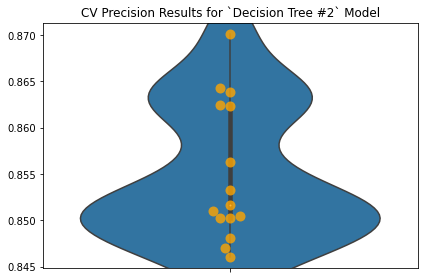

In [909]:
#cross validation of scores
model_results_2 = ModelWithCV(model= dt_model_2, model_name='Decision Tree #2',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results_2.plot_cv(ax)
plt.tight_layout();

# Print CV results
model_results_2.print_cv_summary()

In [1049]:
#making a dataframe out of the column
cv_df = get_cross_val_dataframe(dt_model_2, X_train, y_train, kfolds=5, scoring="precision")
model_cv_mean['Decision Tree #2'] = np.mean(cv_df)

In [1050]:
model_cv_mean

,Base Model,Decision Tree #2
precision,0.809689,0.849551


In [ ]:
plot_top_15_features(dt_model_2, X_train, 15)

# Model #3  - Random Forest

In [938]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features='sqrt', max_samples=0.3, random_state=1,class_weight="balanced")
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       max_samples=0.3, random_state=1)

In [913]:
forest.score(X_train, y_train)

0.9015569753737361

CV Results for `Random Forest #2` model:
            0.80529 ± 0.00543 precision
        


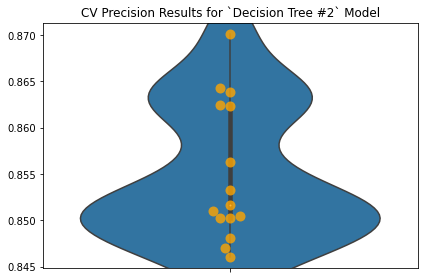

In [915]:
#cross validation of scores
forest_model_results = ModelWithCV(model= forest, model_name='Random Forest #2',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results_2.plot_cv(ax)
plt.tight_layout();

# Print CV results
forest_model_results.print_cv_summary()

In [1051]:
cv_df = get_cross_val_dataframe(forest, X_train, y_train, kfolds=5, scoring="precision")
model_cv_mean['Random Forest'] = np.mean(cv_df)
model_cv_mean

,Base Model,Decision Tree #2,Random Forest
precision,0.809689,0.849551,0.804428


In [ ]:
plot_top_15_features(forest, X_train, 15)

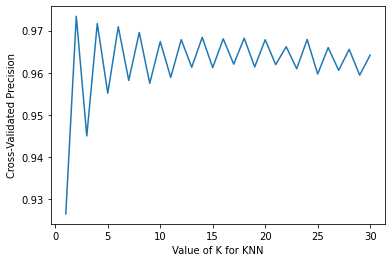

In [918]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_t, y_t, cv=5, scoring='precision')
    k_scores.append(scores.mean())

    # plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Precision')
plt.show()

## Decision Tree - Grid Search

In this grid search, I will be adjusting hyperparameters to fix the class imbalance and determine the best depth and sample leafs for the decision tree.

Due to the large class imbalance, I have parced through a variety of weights.

Currently, their is a large class imbalance.

In [935]:
grid = {
    'criterion':['entropy', 'gini'],
    'max_depth': [5, 6, 7, 10, 12],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced']
}

gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5, verbose=2, scoring="precision")

gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, cr

[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=b

[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_sa

[CV]  class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5, total=   0.1s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 10, 12],
                         'min_samples_leaf': [1, 3, 5]},
             scoring='precision', verbose=2)

In [939]:
# Best Hyperparameters
dt_gs = gs.best_params_
dt_gs

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3}

In [940]:
# Best CV score mean
dt_gs_best_cv = gs.best_score_
dt_gs_best_cv

0.861690134463528

In [941]:
# We can find the best estimator
dt_best_model = gs.best_estimator_
dt_best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

In [952]:
#saving final decision tree best model params
dt_best_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

#fitting model
dt_best_model.fit(X_train, y_train)

dt_best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

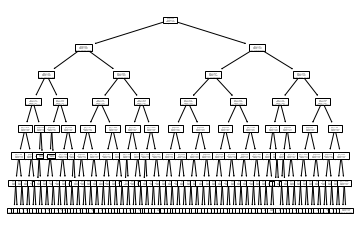

In [953]:
#plotting tree
plot_tree(dt_best_model);

CV Results for `tree_bi` model:
            0.81510 ± 0.00875 precision
        


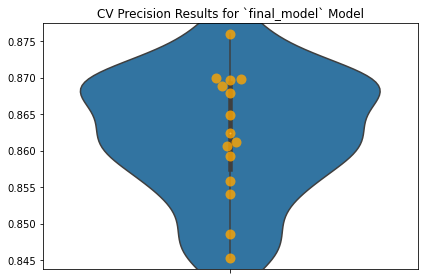

In [954]:
final_model_results = ModelWithCV(
                        model=best_model,
                        model_name='final_model',
                        X=X_train, 
                        y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();


# Print CV results
model_results.print_cv_summary()

In [1052]:
cv_df = get_cross_val_dataframe(dt_best_model, X_train, y_train, kfolds=5, scoring="precision")
model_cv_mean['Decision Tree - Grid Search'] = np.mean(cv_df)
model_cv_mean

,Base Model,Decision Tree #2,Random Forest,Decision Tree - Grid Search
precision,0.809689,0.849551,0.804428,0.862239


# Random Forest - Grid Search

In [947]:
grid = {
    'max_features':['sqrt', 'gini', "entropy"],
    'max_samples': [.1 , .5, .7],
    'class_weight': ['balanced','balanced_subsample']
}

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.5, total=   1.2s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.5, total=   1.2s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.5, total=   1.3s
[CV] class_weight=bal

/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=gini, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.6s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.5 
[CV]  class_weight=balanced_s

/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'gini', 'entropy'],
                         'max_samples': [0.1, 0.5, 0.7]},
             verbose=2)

In [948]:
# Best Hyperparameters
rf_gs = gs.best_params_
rf_gs

{'class_weight': 'balanced_subsample',
 'max_features': 'sqrt',
 'max_samples': 0.7}

In [949]:
# Best CV score mean
rf_gs_best_cv = gs.best_score_
rf_gs_best_cv

0.797655663915979

In [950]:
# We can find the best estimator
rf_best_model = gs.best_estimator_
rf_best_model

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       max_samples=0.7)

In [951]:
#saving final random forest best model params
rf_best_model = RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       max_samples=0.7)

#fitting
rf_best_model.fit(X_train, y_train)

rf_best_model

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       max_samples=0.7)

CV Results for `rf_final_model` model:
            0.81462 ± 0.00656 precision
        


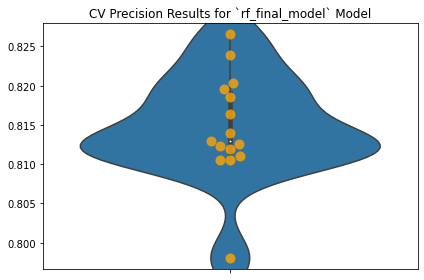

In [955]:
final_model_results = ModelWithCV(
                        model=rf_best_model,
                        model_name='rf_final_model',
                        X=X_train_2, 
                        y=y_train_2)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();

# Print CV results
final_model_results.print_cv_summary()

In [1053]:
cv_df = get_cross_val_dataframe(rf_best_model, X_train, y_train, kfolds=5, scoring="precision")
model_cv_mean['Random Forest - Grid Search'] = np.mean(cv_df)
model_cv_mean

,Base Model,Decision Tree #2,Random Forest,Decision Tree - Grid Search,Random Forest - Grid Search
precision,0.809689,0.849551,0.804428,0.862239,0.81129


# Final Model Selection - Decision Tree from Grid Search

After analyzing the cross vaildation score, **dt_best_model** is the best performing model on the training data. 

After looking at the testing data, the overall performance dropped from **86% to 81%**. This is only a slight drop, and shows that the model is performing well.

The precision for the target class, "Above 4 Stars" is slightly higher, which is not surprising given the large class imbalance, which was addressed by adjusting the weights.

In [1054]:
model_cv_mean

,Base Model,Decision Tree #2,Random Forest,Decision Tree - Grid Search,Random Forest - Grid Search
precision,0.809689,0.849551,0.804428,0.862239,0.81129


In [1168]:
y_pred_test = rf_best_model.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.41      0.52      1891
           1       0.81      0.94      0.87      5018

    accuracy                           0.80      6909
   macro avg       0.77      0.67      0.70      6909
weighted avg       0.79      0.80      0.77      6909



Validating on test data

CV Results for `tree_bi` model:
            0.81510 ± 0.00875 precision
        


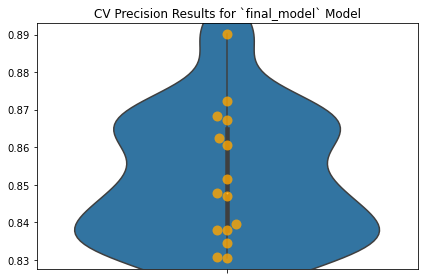

In [963]:
final_model_results = ModelWithCV(
                        model=best_model,
                        model_name='final_model',
                        X=X_test, 
                        y=y_test)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();


# Print CV results
model_results.print_cv_summary()

In [1059]:
cv_df = get_cross_val_dataframe(rf_best_model, X_test, y_test, kfolds=5, scoring="precision")
model_cv_mean['Final Decision Tree'] = np.mean(cv_df)

In [1231]:
transformed_model = model_cv_mean.transpose()
transformed_model.reset_index(inplace=True)
transformed_model.rename(columns={"index":"Model", "precision":"CV Precision Mean"}, inplace=True)

In [1232]:
keep = transformed_model
keep

,Model,CV Precision Mean
0,Base Model,0.809689
1,Decision Tree #2,0.849551
2,Random Forest,0.804428
3,Decision Tree - Grid Search,0.862239
4,Random Forest - Grid Search,0.811290
5,Final Decision Tree,0.793948


In [1250]:
transformed_model

,Model,CV Precision Mean
0,Base Model,0.81
3,Final Model,0.86


In [1233]:
transformed_model['CV Precision Mean'] = transformed_model['CV Precision Mean'].round(2)

In [1235]:
transformed_model = transformed_model.loc[(transformed_model['Model'] == "Base Model") | (transformed_model['Model'] == "Decision Tree - Grid Search")]

In [1249]:
transformed_model['Model'] = transformed_model['Model'].str.replace('Decision Tree - Grid Search', 'Final Model',regex=True)

<ipython-input-1249-cb077641adad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1251]:
import plotly.graph_objects as go

#plotting bar chart
fig = px.bar(transformed_model, x="Model", y="CV Precision Mean",height=600, text="CV Precision Mean")

#centering title
fig.update_layout(title_text='Model Comparison', title_x=0.5, title_y=0.95, xaxis_type="category",
                 font = dict(size=15),paper_bgcolor="#ffffff")

fig.update_traces(marker_color = "#11ace4", textposition='outside')

fig.update_yaxes(range=[0, 1])

newnames = {'Base Model':'Base', 'Decision Tree - Grid Search': 'Final'}

fig.show()

In [1384]:
plot_top_15_features(dt_best_model, X_test, 5)

,0,Feature
18,0.263396,dishes
8,0.215680,price
1,0.151749,superhost
0,0.074012,host response rate
12,0.056199,essentials
3,0.035790,longitude
5,0.022886,bathrooms
2,0.017281,latitude
19,0.017228,refrigerator
24,0.013655,heating


In [1132]:
tree_features = (dt_best_model.feature_importances_)
tree_features = pd.DataFrame(tree_features)
    
#renaming column
tree_features["Feature"] = X_test.columns.values
    
#sorting the top 15 most important features
top_15_features = tree_features.sort_values(0,ascending=False).head(20)

#renaming feature column
top_15_features.rename(columns={0:"Importance"}, inplace=True)

In [1133]:
top_15_features

,Importance,Feature
18,0.263396,dishes
8,0.215680,price
1,0.151749,host_is_superhost
0,0.074012,host_response_rate
12,0.056199,essentials
3,0.035790,longitude
5,0.022886,bathrooms
2,0.017281,latitude
19,0.017228,refrigerator
24,0.013655,heating


In [1134]:
top_15_features['Feature'] = top_15_features['Feature'].astype(str)

In [264]:
top_15_features_no = top_15_features[top_15_features['Feature'].str.contains("host_is_superhost","host_response_rate") == False]
top_15_features_no.head()

In [1279]:
top_15_features = top_15_features.rename(columns={"host_response_rate":"host response rate"}, inplace=True)

In [1376]:
top_15_features_no = top_15_features_no.rename(columns={"host_response_rate":"host response rate"})

In [1146]:
#using plotly to plot the top featurescolor=
fig = px.bar(top_15_features_no.head(4), x="Feature", y="Importance", title = "Top Features" )
fig.update_layout(title_text='Feature Importance', title_x=0.5)
fig.update_traces(marker_color = "#193d99")
fig.show()

In [ ]:
#using plotly to plot the top features
fig = px.bar(top_15_features.head(5), x="Feature", y="Importance", title = "Top Features")
fig.update_layout(title_text='Feature Importance', title_x=0.5)
fig.show()

In [1252]:
above_4_stars = model_dt_df.loc[model_dt_df]

,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,...,neighbourhood_cleansed_Phaistos,neighbourhood_cleansed_Platanias,neighbourhood_cleansed_Rethymno,neighbourhood_cleansed_Sfakia,neighbourhood_cleansed_Siteia,neighbourhood_cleansed_Viannos,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0,Heraklion,35.340050,25.128090,Entire home/apt,6,1.5,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1,Malevizi,35.331980,25.081820,Entire home/apt,3,1.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1,Rethymno,35.354410,24.587130,Entire home/apt,6,5.0,3.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1,Rethymno,35.355960,24.584100,Entire home/apt,12,7.0,6.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0,Kissamos,35.497620,23.697680,Entire home/apt,6,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23053,0.0,0,Agios Vasilios,35.169409,24.452855,Entire home/apt,7,1.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23054,1.0,1,Amari,35.247463,24.567706,Entire home/apt,15,4.0,6.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23055,0.9,0,Heraklion,35.339489,25.121428,Entire home/apt,2,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23056,1.0,0,Kissamos,35.499830,23.647820,Entire home/apt,3,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#plotting bar chart
fig = px.bar(model_dt_df, x="is_grte_4stars", y="host_is_superhost",height=600, text="host_is_superhost",
            labels={1:'Above 4 Stars', 0: 'Below 4 Stars'})

fig.update_layout(title_text='Feature Importance', title_x=0.5)

fig.show()

In [1309]:
model_dt_df['price'].sort_values(ascending=False)

12385    20079.0
10332    17221.0
8423     15960.0
17963    11600.0
17968    11600.0
          ...   
15293       10.0
17863       10.0
4171        10.0
9546        10.0
21002       10.0
Name: price, Length: 23030, dtype: float64

In [1293]:
four_star = model_dt_df[["is_grte_4stars", "host_is_superhost"]].copy()

In [1296]:
four_star.rename(columns={"is_grte_4stars":"above four stars", "host_is_superhost":"host is superhost"}, inplace=True)

In [ ]:
model_dt_df.rename()

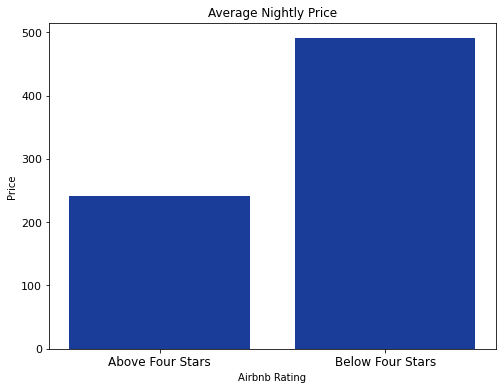

In [1371]:
# group the data by the "is_grte_4stars" column and calculate the mean price for each group
grouped = final_feature_df.groupby("is_grte_4stars")["price"].mean()

fig = plt.figure(figsize = (8, 6))

# create a bar plot
plt.bar(grouped.index, grouped.values, color="#193d99")

# set the x-axis label
plt.xlabel("Airbnb Rating")

# set the y-axis label
plt.ylabel("Price")

#adding title
plt.title("Average Nightly Price")

# show the plot
plt.show()

In [1372]:
final_feature_df.groupby("is_grte_4stars")["price"].mean()

is_grte_4stars
Above Four Stars    241.648737
Below Four Stars    490.650706
Name: price, dtype: float64

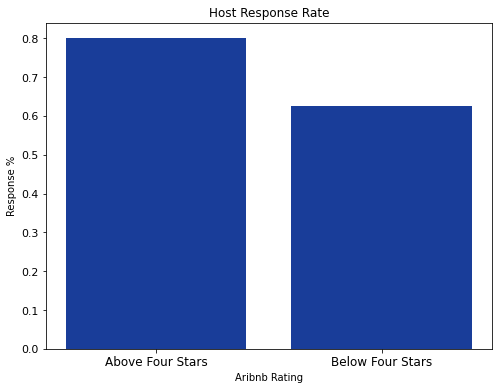

In [1386]:
# group the data by the "is_grte_4stars" column and calculate the mean price for each group
grouped = final_feature_df.groupby("is_grte_4stars")["host_response_rate"].mean()

fig = plt.figure(figsize = (8, 6))

# create a bar plot
plt.bar(grouped.index, grouped.values, color="#193d99")

# set the x-axis label
plt.xlabel("Aribnb Rating")

# set the y-axis label
plt.ylabel("Response %")

#adding title
plt.title("Host Response Rate")

# show the plot
plt.show()

In [1387]:
final_feature_df.groupby("is_grte_4stars")["host_response_rate"].mean()

is_grte_4stars
Above Four Stars    0.800374
Below Four Stars    0.626025
Name: host_response_rate, dtype: float64

In [1332]:
four_stars = feature_df.loc[feature_df["airbnb_rating"] == "4 Stars" | feature_df["airbnb_rating"] == "4 Stars"]

## Conclusions

As a result of this analysis, three features with the highest feature importance have been identified as the most important in classifying airbnb ratings in Crete:

**Price**

Increasing footage of home by approximately 964sq.ft increases the price by a factor of 1.227 or 22.7%.

**Home Essentials**

Kitchen and home essentials are among the strongest features that impact rating. It is important that hosts stock on on these.

**Host Response Rate**

Responsive hosts lead to higher ratings

## Next Steps

From the initial modeling research, it is clear that the number of ratings and overall ratings play a large role in predicting whether an airbnb listing will be highly rated. To gain a more comprehensive understanding of why it would be beneficial to do further reserach into this to determine what other features are important in prediticting prices.

In addition, it would be beneficial to examine more airbnb data to improve on the class imbalance that was present.